<a href="https://colab.research.google.com/github/tonybanjo2001/BAN6800-Module-4/blob/main/Module_4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Necessary and needed Libraries alongside the Data**

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# Regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor

# Classification models libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# XGBoost models (if not installed, uncomment the next two lines)
!pip install xgboost
from xgboost import XGBRegressor, XGBClassifier

# For inline plotting
%matplotlib inline


In [149]:
# Function to load Google Sheets data
def load_google_sheet(sheet_url):
    csv_url = sheet_url.replace("/edit?usp=sharing", "/gviz/tq?tqx=out:csv")
    return pd.read_csv(csv_url)

# Define Google Sheets URLs
sheets = {
    "dai_data": "https://docs.google.com/spreadsheets/d/1VECr6m9WLtGTzm9NmH1-zr-QC4b4Bc-TwhSC4ccCEzc/edit?usp=sharing",
    "hatch_data": "https://docs.google.com/spreadsheets/d/1G2xFtjYwx25sQCG7HXUOeShaJf50bI2iotK1pnjaaHI/edit?usp=sharing",
    "stock_data": "https://docs.google.com/spreadsheets/d/1WChQ8C35ywn_hyF5cWZ_XiNxgYXlsmHoLEdyNPz2YPs/edit?usp=sharing"
}


In [150]:
# Load the data from all three sheets
dataframes = {name: load_google_sheet(url) for name, url in sheets.items()}

# Display first few rows of each dataset
for name, df in dataframes.items():
    print(f"\n📌 First 5 rows of {name} dataset:")
    display(df.head())


# Overview of the dataset
print(df.info())
print(df.describe())


📌 First 5 rows of dai_data dataset:


country  Year  Digital Adoption Index  DAI Business Sub-index  \
0  Afghanistan  2014                0.302608                0.296788   
1  Afghanistan  2016                0.343214                0.341886   
2      Albania  2014                0.543884                0.554248   
3      Albania  2016                0.607904                0.621125   
4      Algeria  2014                0.369554                0.449673   

   DAI People Sub-index  DAI Government Sub-index  
0              0.087707                  0.523330  
1              0.123343                  0.564413  
2              0.387060                  0.690344  
3              0.463779                  0.738807  
4              0.279038                  0.379950


📌 First 5 rows of hatch_data dataset:


Model        Scenario  \
0  Technology Indicators  Release 2023.1   
1  Technology Indicators  Release 2023.1   
2  Technology Indicators  Release 2023.1   
3  Technology Indicators  Release 2023.1   
4  Technology Indicators  Release 2023.1   

                                            Variable      Short Name Unit  \
0           Cumulative Total Capacity|Oil Refineries  Oil Refineries   MW   
1   Cumulative Total Capacity|Electricity|Coal Power      Coal Power   MW   
2  Cumulative Total Capacity|Electricity|Hydro Power     Hydro Power   MW   
3  Cumulative Total Capacity|Electricity|Natural Gas     Natural Gas   MW   
4            Cumulative Total Capacity|Jet Aircrafts   Jet Aircrafts   MW   

  Region  1720  1721  1722  1723  ...      2013       2014       2015  \
0  World   NaN   NaN   NaN   NaN  ...       NaN        NaN        NaN   
1  World   NaN   NaN   NaN   NaN  ...       NaN        NaN        NaN   
2  World   NaN   NaN   NaN   NaN  ...  990113.0  1026227.0  1058285.0   
3  World   NaN   NaN   NaN   NaN  ...       NaN        NaN        NaN   
4  World   NaN   NaN   NaN   NaN  ...       NaN        NaN        NaN   

        2016       2017  2018  2019  2020  2021  2022  
0        NaN        NaN   NaN   NaN   NaN   NaN   NaN  
1        NaN        NaN   NaN   NaN   NaN   NaN   NaN  
2  1085809.0  1108481.0   NaN   NaN   NaN   NaN   NaN  
3        NaN        NaN   NaN   NaN   NaN   NaN   NaN  
4        NaN        NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 309 columns]


📌 First 5 rows of stock_data dataset:


Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Copy Data for Further Processing**

In [151]:
# To Create copies of the dataframes for processing
dai_data = dataframes["dai_data"].copy()
hatch_data = dataframes["hatch_data"].copy()
stock_data = dataframes["stock_data"].copy()


**Apply Styling to DataFrames**

In [152]:
# Function to apply styling to DataFrames
def style_dataframe(df):
    return df.style.set_properties(**{
        'background-color': 'lightgrey',
        'color': 'black',
        'border-color': 'white'
    })

# Apply styling to each DataFrame
styled_dai_data = style_dataframe(dai_data)
styled_hatch_data = style_dataframe(hatch_data)
styled_stock_data = style_dataframe(stock_data)

# Display styled DataFrames
print("Styled dai_data:")
display(styled_dai_data)
print("Styled hatch_data:")
display(styled_hatch_data)
print("Styled stock_data:")
display(styled_stock_data)


Styled dai_data:


Styled hatch_data:


Styled stock_data:


# **Data Check and Cleaning Process**

In [153]:
# Function to check and clean data
def check_and_clean_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDuplicate Rows:")
    print(df.duplicated().sum())
    print("\nSummary Statistics:")
    print(df.describe(include='all'))
    return df

# Apply the function to each DataFrame
dai_data = check_and_clean_data(dai_data)
hatch_data = check_and_clean_data(hatch_data)
stock_data = check_and_clean_data(stock_data)


Data Types:
country                      object
Year                          int64
Digital Adoption Index      float64
DAI Business Sub-index      float64
DAI People Sub-index        float64
DAI Government Sub-index    float64
dtype: object

Missing Values:
country                     0
Year                        0
Digital Adoption Index      6
DAI Business Sub-index      0
DAI People Sub-index        0
DAI Government Sub-index    6
dtype: int64

Duplicate Rows:
0

Summary Statistics:
            country         Year  Digital Adoption Index  \
count           366   366.000000              360.000000   
unique          183          NaN                     NaN   
top     Afghanistan          NaN                     NaN   
freq              2          NaN                     NaN   
mean            NaN  2015.000000                0.496687   
std             NaN     1.001369                0.192720   
min             NaN  2014.000000                0.138555   
25%             NaN  2014.00

In [154]:
# Function to handle duplicates and missing values
def handle_duplicates_and_missing_values(df):
    # Drop duplicate rows
    df = df.drop_duplicates()
    # Fill missing values with 'Null'
    df = df.fillna('Null')
    return df

# Apply the function to each DataFrame
dai_data = handle_duplicates_and_missing_values(dai_data)
hatch_data = handle_duplicates_and_missing_values(hatch_data)
stock_data = handle_duplicates_and_missing_values(stock_data)

# Verify no missing values remain
print("Missing Values after cleaning:")
print("dai_data:", dai_data.isnull().sum().sum())
print("hatch_data:", hatch_data.isnull().sum().sum())
print("stock_data:", stock_data.isnull().sum().sum())

Missing Values after cleaning:
dai_data: 0
hatch_data: 0
stock_data: 0


In [155]:
# Function to display statistical summary
def display_statistical_summary(df, name):
    print(f"\nStatistical Summary for {name}:")
    display(df.describe(include='all'))

# Display summaries
display_statistical_summary(dai_data, 'dai_data')
display_statistical_summary(hatch_data, 'hatch_data')
display_statistical_summary(stock_data, 'stock_data')


Statistical Summary for dai_data:


country         Year Digital Adoption Index  \
count           366   366.000000                    366   
unique          183          NaN                    361   
top     Afghanistan          NaN                   Null   
freq              2          NaN                      6   
mean            NaN  2015.000000                    NaN   
std             NaN     1.001369                    NaN   
min             NaN  2014.000000                    NaN   
25%             NaN  2014.000000                    NaN   
50%             NaN  2015.000000                    NaN   
75%             NaN  2016.000000                    NaN   
max             NaN  2016.000000                    NaN   

        DAI Business Sub-index  DAI People Sub-index DAI Government Sub-index  
count               366.000000            366.000000                      366  
unique                     NaN                   NaN                      357  
top                        NaN                   NaN                     Null  
freq                       NaN                   NaN                        6  
mean                  0.559388              0.419583                      NaN  
std                   0.195193              0.242190                      NaN  
min                   0.130037              0.009919                      NaN  
25%                   0.398678              0.199574                      NaN  
50%                   0.560046              0.405670                      NaN  
75%                   0.707369              0.627989                      NaN  
max                   0.973952              0.913343                      NaN


Statistical Summary for hatch_data:


Model        Scenario  \
count                     147             147   
unique                      1               1   
top     Technology Indicators  Release 2023.1   
freq                      147             147   

                                        Variable      Short Name Unit Region  \
count                                        147             147  147    147   
unique                                       147             147   42      3   
top     Cumulative Total Capacity|Oil Refineries  Oil Refineries   MW  World   
freq                                           1               1   34    121   

        1720  1721  1722  1723  ...  2013  2014  2015  2016  2017  2018  2019  \
count    147   147   147   147  ...   147   147   147   147   147   147   147   
unique     2     1     1     1  ...    57    56    57    53    51    39    31   
top     Null  Null  Null  Null  ...  Null  Null  Null  Null  Null  Null  Null   
freq     146   147   147   147  ...    91    92    91    95    97   109   117   

        2020  2021  2022  
count    147   147   147  
unique    25     7     1  
top     Null  Null  Null  
freq     123   141   147  

[4 rows x 309 columns]


Statistical Summary for stock_data:


Ticker Symbol Security  GICS Sector  \
count            340      340          340   
unique           340      340           11   
top              ZTS   Zoetis  Industrials   
freq               1        1           53   
mean             NaN      NaN          NaN   
std              NaN      NaN          NaN   
min              NaN      NaN          NaN   
25%              NaN      NaN          NaN   
50%              NaN      NaN          NaN   
75%              NaN      NaN          NaN   
max              NaN      NaN          NaN   

                         GICS Sub Industry  Current Price  Price Change  \
count                                  340     340.000000    340.000000   
unique                                 104            NaN           NaN   
top     Oil & Gas Exploration & Production            NaN           NaN   
freq                                    16            NaN           NaN   
mean                                   NaN      80.862345      4.078194   
std                                    NaN      98.055086     12.006338   
min                                    NaN       4.500000    -47.129693   
25%                                    NaN      38.555000     -0.939484   
50%                                    NaN      59.705000      4.819505   
75%                                    NaN      92.880001     10.695493   
max                                    NaN    1274.949951     55.051683   

        Volatility         ROE  Cash Ratio  Net Cash Flow    Net Income  \
count   340.000000  340.000000  340.000000   3.400000e+02  3.400000e+02   
unique         NaN         NaN         NaN            NaN           NaN   
top            NaN         NaN         NaN            NaN           NaN   
freq           NaN         NaN         NaN            NaN           NaN   
mean      1.525976   39.597059   70.023529   5.553762e+07  1.494385e+09   
std       0.591798   96.547538   90.421331   1.946365e+09  3.940150e+09   
min       0.733163    1.000000    0.000000  -1.120800e+10 -2.352800e+10   
25%       1.134878    9.750000   18.000000  -1.939065e+08  3.523012e+08   
50%       1.385593   15.000000   47.000000   2.098000e+06  7.073360e+08   
75%       1.695549   27.000000   99.000000   1.698108e+08  1.899000e+09   
max       4.580042  917.000000  958.000000   2.076400e+10  2.444200e+10   

        Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  \
count           340.000000                  3.400000e+02  340.000000   
unique                 NaN                           NaN         NaN   
top                    NaN                           NaN         NaN   
freq                   NaN                           NaN         NaN   
mean              2.776662                  5.770283e+08   32.612563   
std               6.587779                  8.458496e+08   44.348731   
min             -61.200000                  2.767216e+07    2.935451   
25%               1.557500                  1.588482e+08   15.044653   
50%               2.895000                  3.096751e+08   20.819876   
75%               4.620000                  5.731175e+08   31.764755   
max              50.090000                  6.159292e+09  528.039074   

         P/B Ratio  
count   340.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean     -1.718249  
std      13.966912  
min     -76.119077  
25%      -4.352056  
50%      -1.067170  
75%       3.917066  
max     129.064585

# **Performimg Exploratory Data Analysis (EDA): This will systematically uncover key patterns and anomalies in the data to inform robust feature engineering and guide the subsequent model development process.**

In [156]:
def perform_eda(df, dataset_name):
    """
    Perform EDA by plotting Distribution and Box Plots for numerical features.

    Parameters:
    - df: pandas DataFrame containing the dataset.
    - dataset_name: String name of the dataset.
    """
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    for col in numerical_cols:
        plt.figure(figsize=(14, 6))

        # Distribution Plot
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, color='blue')
        plt.title(f'Distribution of {col} in {dataset_name}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color='green')
        plt.title(f'Box Plot of {col} in {dataset_name}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

        # Perform EDA on dai_data
        perform_eda(dai_data, 'dai_data')

        # Perform EDA on hatch_data
        perform_eda(hatch_data, 'hatch_data')

        # Perform EDA on stock_data
        perform_eda(stock_data, 'stock_data')

**Univariate analysis and Bivariate Analysis**

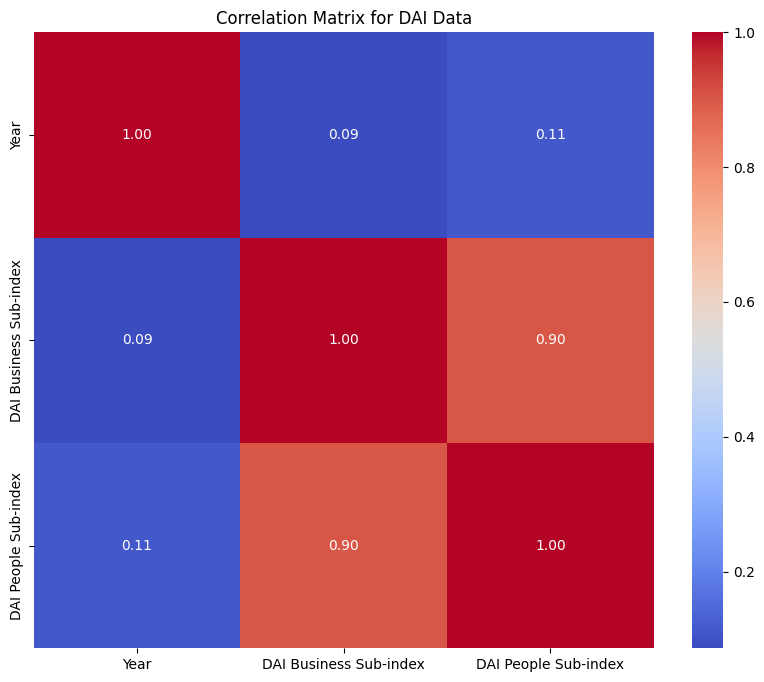

No numeric columns in Hatch Data to plot correlation heatmap.


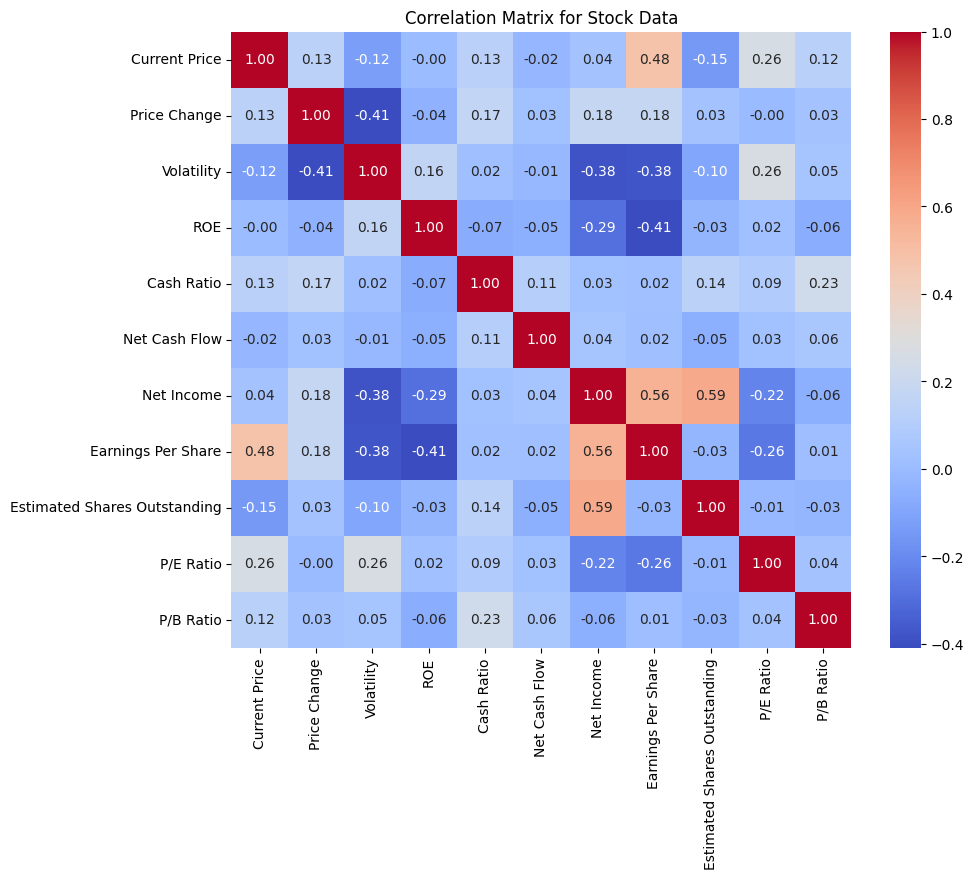

In [157]:


# Convert numeric-like columns in hatch_data
for col in hatch_data.columns:
    try:
        hatch_data[col] = pd.to_numeric(hatch_data[col])
    except ValueError:
        # If conversion fails, leave it as is (likely a true string column)
        pass

def plot_correlation_heatmap(df, dataset_name):
    """
    Plot a correlation heatmap for the dataframe's numerical features.
    """
    numerical_cols = df.select_dtypes(include=['number'])
    if numerical_cols.shape[1] == 0:
        print(f"No numeric columns in {dataset_name} to plot correlation heatmap.")
        return

    plt.figure(figsize=(10,8))
    corr_matrix = numerical_cols.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for {dataset_name}')
    plt.show()

# Now call the function again
plot_correlation_heatmap(dai_data, 'DAI Data')
plot_correlation_heatmap(hatch_data, 'Hatch Data')
plot_correlation_heatmap(stock_data, 'Stock Data')


# **Feature Engineering & Data Preprocessing**

In [158]:
# %% [code]
# ----------------------------------------------------
# Feature Engineering & Data Preprocessing for DAI Data
# -----------------------------------------------------
df_dai = dai_data.copy()
print("DAI Data Types:")
print(df_dai.dtypes)

# Encode categorical columns in dai_data
for col in df_dai.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_dai[col] = le.fit_transform(df_dai[col].astype(str))
    print(f"Encoded column: {col}")

# Define target variable for DAI Data
# Assuming the target is 'Digital_Readiness_Index'; if not present, choose the last numeric column.
target_dai = 'Digital_Readiness_Index'
if target_dai not in df_dai.columns:
    target_dai = df_dai.select_dtypes(include=['number']).columns[-1]

# Separate features and target
X_dai = df_dai.drop(columns=[target_dai])
y_dai = df_dai[target_dai]

# Scale the features
scaler_dai = StandardScaler()
X_dai_scaled = scaler_dai.fit_transform(X_dai)
print("DAI X_scaled shape:", X_dai_scaled.shape)

# --------------------------------------------------------
# Feature Engineering & Data Preprocessing for HATCH Data
# --------------------------------------------------------
df_hatch = hatch_data.copy()
print("\nHatch Data Types:")
print(df_hatch.dtypes)

# Encode categorical columns in hatch_data
for col in df_hatch.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_hatch[col] = le.fit_transform(df_hatch[col].astype(str))
    print(f"Encoded column: {col}")

# Define target variable for HATCH Data
# Assuming the target is 'Cumulative_Adoption_Trends'; if not present, choose the last numeric column.
target_hatch = 'Cumulative_Adoption_Trends'
if target_hatch not in df_hatch.columns:
    target_hatch = df_hatch.select_dtypes(include=['number']).columns[-1]

# Separate features and target
X_hatch = df_hatch.drop(columns=[target_hatch])
y_hatch = df_hatch[target_hatch]

# Scale the features
scaler_hatch = StandardScaler()
X_hatch_scaled = scaler_hatch.fit_transform(X_hatch)
print("Hatch X_scaled shape:", X_hatch_scaled.shape)

# ---------------------------------------------------------
# Feature Engineering & Data Preprocessing for STOCK Data
# -------------------------------
df_stock = stock_data.copy()
print("\nStock Data Types:")
print(df_stock.dtypes)

# Encode categorical columns in stock_data
for col in df_stock.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_stock[col] = le.fit_transform(df_stock[col].astype(str))
    print(f"Encoded column: {col}")

# Define target variable for STOCK Data
# Assuming the target is 'Growth_Rate'; if not present, choose the last numeric column.
target_stock = 'Growth_Rate'
if target_stock not in df_stock.columns:
    target_stock = df_stock.select_dtypes(include=['number']).columns[-1]

# Separate features and target
X_stock = df_stock.drop(columns=[target_stock])
y_stock = df_stock[target_stock]

# Scale the features
scaler_stock = StandardScaler()
X_stock_scaled = scaler_stock.fit_transform(X_stock)
print("Stock X_scaled shape:", X_stock_scaled.shape)


DAI Data Types:
country                      object
Year                          int64
Digital Adoption Index       object
DAI Business Sub-index      float64
DAI People Sub-index        float64
DAI Government Sub-index     object
dtype: object
Encoded column: country
Encoded column: Digital Adoption Index
Encoded column: DAI Government Sub-index
DAI X_scaled shape: (366, 5)

Hatch Data Types:
Model         object
Scenario      object
Variable      object
Short Name    object
Unit          object
               ...  
2018          object
2019          object
2020          object
2021          object
2022          object
Length: 309, dtype: object
Encoded column: Model
Encoded column: Scenario
Encoded column: Variable
Encoded column: Short Name
Encoded column: Unit
Encoded column: Region
Encoded column: 1720
Encoded column: 1721
Encoded column: 1722
Encoded column: 1723
Encoded column: 1724
Encoded column: 1725
Encoded column: 1726
Encoded column: 1727
Encoded column: 1728
Encoded colu

# **Data Splitting**

In [159]:
# %% [code]
from sklearn.model_selection import train_test_split

# -------------------------------
# DAI Data Splits
# -------------------------------
# Regression split for DAI
X_train_reg_dai, X_test_reg_dai, y_train_reg_dai, y_test_reg_dai = train_test_split(X_dai_scaled, y_dai, test_size=0.2, random_state=42)

# Classification split for DAI: binary target based on the median value
median_dai = y_dai.median()
y_class_dai = (y_dai > median_dai).astype(int)
X_train_clf_dai, X_test_clf_dai, y_train_clf_dai, y_test_clf_dai = train_test_split(X_dai_scaled, y_class_dai, test_size=0.2, random_state=42)

print("DAI Data:")
print("  Regression training set size:", X_train_reg_dai.shape)
print("  Classification training set size:", X_train_clf_dai.shape)

# -------------------------------
# HATCH Data Splits
# -------------------------------
# Regression split for HATCH
X_train_reg_hatch, X_test_reg_hatch, y_train_reg_hatch, y_test_reg_hatch = train_test_split(X_hatch_scaled, y_hatch, test_size=0.2, random_state=42)

# Classification split for HATCH: binary target based on the median value
median_hatch = y_hatch.median()
y_class_hatch = (y_hatch > median_hatch).astype(int)
X_train_clf_hatch, X_test_clf_hatch, y_train_clf_hatch, y_test_clf_hatch = train_test_split(X_hatch_scaled, y_class_hatch, test_size=0.2, random_state=42)

print("\nHATCH Data:")
print("  Regression training set size:", X_train_reg_hatch.shape)
print("  Classification training set size:", X_train_clf_hatch.shape)

# -------------------------------
# STOCK Data Splits
# -------------------------------
# Regression split for STOCK
X_train_reg_stock, X_test_reg_stock, y_train_reg_stock, y_test_reg_stock = train_test_split(X_stock_scaled, y_stock, test_size=0.2, random_state=42)

# Classification split for STOCK: binary target based on the median value
median_stock = y_stock.median()
y_class_stock = (y_stock > median_stock).astype(int)
X_train_clf_stock, X_test_clf_stock, y_train_clf_stock, y_test_clf_stock = train_test_split(X_stock_scaled, y_class_stock, test_size=0.2, random_state=42)

print("\nSTOCK Data:")
print("  Regression training set size:", X_train_reg_stock.shape)
print("  Classification training set size:", X_train_clf_stock.shape)


DAI Data:
  Regression training set size: (292, 5)
  Classification training set size: (292, 5)

HATCH Data:
  Regression training set size: (117, 308)
  Classification training set size: (117, 308)

STOCK Data:
  Regression training set size: (272, 14)
  Classification training set size: (272, 14)


# **Model Building & Training**

**Regression Models**
**A. Decision Tree Regressor for DAI Data**

In [160]:
# %% [markdown]
# ### Decision Tree Regressor (Regression) - DAI Data
# This section builds and evaluates a Decision Tree Regressor for DAI Data.

# %% [code]
# Define the Decision Tree Regressor pipeline for DAI Data
dt_reg_pipeline_dai = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(random_state=42))
])

# Fit the model on HATCH training data
dt_reg_pipeline_dai.fit(X_train_reg_dai, y_train_reg_dai)

# Predict and evaluate on HATCH test data
y_pred_dt_dai = dt_reg_pipeline_dai.predict(X_test_reg_dai)
mse_dt_dai = mean_squared_error(y_test_reg_dai, y_pred_dt_dai)
rmse_dt_dai = np.sqrt(mse_dt_dai)
r2_dt_dai = r2_score(y_test_reg_dai, y_pred_dt_dai)

print("Decision Tree Regressor Performance for DAI Data:")
print(f"MSE: {mse_dt_dai:.2f}, RMSE: {rmse_dt_dai:.2f}, R²: {r2_dt_dai:.2f}")

Decision Tree Regressor Performance for DAI Data:
MSE: 2257.24, RMSE: 47.51, R²: 0.75


**Decision Tree Regressor for HATCH Data**

In [161]:
# %% [markdown]
# ### Decision Tree Regressor (Regression) - HATCH Data
# This section builds and evaluates a Decision Tree Regressor for HATCH Data.

# %% [code]
# Define the Decision Tree Regressor pipeline for HATCH Data
dt_reg_pipeline_hatch = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(random_state=42))
])

# Fit the model on HATCH training data
dt_reg_pipeline_hatch.fit(X_train_reg_hatch, y_train_reg_hatch)

# Predict and evaluate on HATCH test data
y_pred_dt_hatch = dt_reg_pipeline_hatch.predict(X_test_reg_hatch)
mse_dt_hatch = mean_squared_error(y_test_reg_hatch, y_pred_dt_hatch)
rmse_dt_hatch = np.sqrt(mse_dt_hatch)
r2_dt_hatch = r2_score(y_test_reg_hatch, y_pred_dt_hatch)

print("Decision Tree Regressor Performance for HATCH Data:")
print(f"MSE: {mse_dt_hatch:.2f}, RMSE: {rmse_dt_hatch:.2f}, R²: {r2_dt_hatch:.2f}")


Decision Tree Regressor Performance for HATCH Data:
MSE: 0.00, RMSE: 0.00, R²: 1.00


**Decision Tree Regressor for STOCK Data**

In [162]:
# %% [markdown]
# ### Decision Tree Regressor (Regression) - STOCK Data
# This section builds and evaluates a Decision Tree Regressor for STOCK Data.

# %% [code]
# Define the Decision Tree Regressor pipeline for STOCK Data
dt_reg_pipeline_stock = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(random_state=42))
])

# Fit the model on STOCK training data
dt_reg_pipeline_stock.fit(X_train_reg_stock, y_train_reg_stock)

# Predict and evaluate on STOCK test data
y_pred_dt_stock = dt_reg_pipeline_stock.predict(X_test_reg_stock)
mse_dt_stock = mean_squared_error(y_test_reg_stock, y_pred_dt_stock)
rmse_dt_stock = np.sqrt(mse_dt_stock)
r2_dt_stock = r2_score(y_test_reg_stock, y_pred_dt_stock)

print("Decision Tree Regressor Performance for STOCK Data:")
print(f"MSE: {mse_dt_stock:.2f}, RMSE: {rmse_dt_stock:.2f}, R²: {r2_dt_stock:.2f}")

Decision Tree Regressor Performance for STOCK Data:
MSE: 200.35, RMSE: 14.15, R²: -1.91


**B.    Random Forest Regressor for DAI Data**

In [163]:
# %% [markdown]
# ### Random Forest Regressor (Regression) - DAI Data
# This section builds and evaluates a Random Forest Regressor for DAI Data.

# %% [code]
rf_reg_pipeline_dai = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

# Fit the model on DAI training data
rf_reg_pipeline_dai.fit(X_train_reg_dai, y_train_reg_dai)

# Predict and evaluate on DAI test data
y_pred_rf_dai = rf_reg_pipeline_dai.predict(X_test_reg_dai)
mse_rf_dai = mean_squared_error(y_test_reg_dai, y_pred_rf_dai)
rmse_rf_dai = np.sqrt(mse_rf_dai)
r2_rf_dai = r2_score(y_test_reg_dai, y_pred_rf_dai)

print("Random Forest Regressor Performance for Dai Data:")
print(f"MSE: {mse_rf_dai:.2f}, RMSE: {rmse_rf_dai:.2f}, R²: {r2_rf_dai:.2f}")

Random Forest Regressor Performance for Dai Data:
MSE: 1187.96, RMSE: 34.47, R²: 0.87


**Random Forest Regressor for HATCH Data**

In [164]:
# %% [markdown]
# ### Random Forest Regressor (Regression) - HATCH Data
# This section builds and evaluates a Random Forest Regressor for HATCH Data.

# %% [code]
rf_reg_pipeline_hatch = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

# Fit the model on HATCH training data
rf_reg_pipeline_hatch.fit(X_train_reg_hatch, y_train_reg_hatch)

# Predict and evaluate on HATCH test data
y_pred_rf_hatch = rf_reg_pipeline_hatch.predict(X_test_reg_hatch)
mse_rf_hatch = mean_squared_error(y_test_reg_hatch, y_pred_rf_hatch)
rmse_rf_hatch = np.sqrt(mse_rf_hatch)
r2_rf_hatch = r2_score(y_test_reg_hatch, y_pred_rf_hatch)

print("Random Forest Regressor Performance for HATCH Data:")
print(f"MSE: {mse_rf_hatch:.2f}, RMSE: {rmse_rf_hatch:.2f}, R²: {r2_rf_hatch:.2f}")

Random Forest Regressor Performance for HATCH Data:
MSE: 0.00, RMSE: 0.00, R²: 1.00


**Random Forest Regressor for STOCK Data**

In [165]:
# %% [markdown]
# ### Random Forest Regressor (Regression) - STOCK Data
# This section builds and evaluates a Random Forest Regressor for STOCK Data.

# %% [code]
rf_reg_pipeline_stock = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

# Fit the model on STOCK training data
rf_reg_pipeline_stock.fit(X_train_reg_stock, y_train_reg_stock)

# Predict and evaluate on STOCK test data
y_pred_rf_stock = rf_reg_pipeline_stock.predict(X_test_reg_stock)
mse_rf_stock = mean_squared_error(y_test_reg_stock, y_pred_rf_stock)
rmse_rf_stock = np.sqrt(mse_rf_stock)
r2_rf_stock = r2_score(y_test_reg_stock, y_pred_rf_stock)

print("Random Forest Regressor Performance for STOCK Data:")
print(f"MSE: {mse_rf_stock:.2f}, RMSE: {rmse_rf_stock:.2f}, R²: {r2_rf_stock:.2f}")

Random Forest Regressor Performance for STOCK Data:
MSE: 84.56, RMSE: 9.20, R²: -0.23


**C. Bagging Regressor for DAI Data**

In [166]:
# %% [markdown]
# ### Bagging Regressor (Regression)
# The Bagging Regressor aggregates multiple Decision Trees to improve robustness.

# %% [code]
bagging_reg_pipeline_dai = Pipeline([
    ('scaler', StandardScaler()),
    ('model', BaggingRegressor(random_state=42))
])

bagging_reg_pipeline_dai.fit(X_train_reg_dai, y_train_reg_dai)

y_pred_bagging_dai = bagging_reg_pipeline_dai.predict(X_test_reg_dai)
mse_bagging_dai = mean_squared_error(y_test_reg_dai, y_pred_bagging_dai)
rmse_bagging_dai = np.sqrt(mse_bagging_dai)
r2_bagging_dai = r2_score(y_test_reg_dai, y_pred_bagging_dai)

print("Bagging Regressor Performance:")
print(f"MSE: {mse_bagging_dai:.2f}, RMSE: {rmse_bagging_dai:.2f}, R²: {r2_bagging_dai:.2f}")

Bagging Regressor Performance:
MSE: 1236.48, RMSE: 35.16, R²: 0.86


**Bagging Regressor for HATCH Data**

In [167]:
# %% [markdown]
# ### Bagging Regressor (Regression) - HATCH Data
# This section builds and evaluates a Bagging Regressor for HATCH Data.

# %% [code]
bagging_reg_pipeline_hatch = Pipeline([
    ('scaler', StandardScaler()),
    ('model', BaggingRegressor(random_state=42))
])

# Fit the model on HATCH training data
bagging_reg_pipeline_hatch.fit(X_train_reg_hatch, y_train_reg_hatch)

# Predict and evaluate on HATCH test data
y_pred_bagging_hatch = bagging_reg_pipeline_hatch.predict(X_test_reg_hatch)
mse_bagging_hatch = mean_squared_error(y_test_reg_hatch, y_pred_bagging_hatch)
rmse_bagging_hatch = np.sqrt(mse_bagging_hatch)
r2_bagging_hatch = r2_score(y_test_reg_hatch, y_pred_bagging_hatch)

print("Bagging Regressor Performance for HATCH Data:")
print(f"MSE: {mse_bagging_hatch:.2f}, RMSE: {rmse_bagging_hatch:.2f}, R²: {r2_bagging_hatch:.2f}")

Bagging Regressor Performance for HATCH Data:
MSE: 0.00, RMSE: 0.00, R²: 1.00


**Bagging Regressor for STOCK Data**

In [168]:
# %% [markdown]
# ### Bagging Regressor (Regression) - STOCK Data
# This section builds and evaluates a Bagging Regressor for STOCK Data.

# %% [code]
bagging_reg_pipeline_stock = Pipeline([
    ('scaler', StandardScaler()),
    ('model', BaggingRegressor(random_state=42))
])

# Fit the model on STOCK training data
bagging_reg_pipeline_stock.fit(X_train_reg_stock, y_train_reg_stock)

# Predict and evaluate on STOCK test data
y_pred_bagging_stock = bagging_reg_pipeline_stock.predict(X_test_reg_stock)
mse_bagging_stock = mean_squared_error(y_test_reg_stock, y_pred_bagging_stock)
rmse_bagging_stock = np.sqrt(mse_bagging_stock)
r2_bagging_stock = r2_score(y_test_reg_stock, y_pred_bagging_stock)

print("Bagging Regressor Performance for STOCK Data:")
print(f"MSE: {mse_bagging_stock:.2f}, RMSE: {rmse_bagging_stock:.2f}, R²: {r2_bagging_stock:.2f}")


Bagging Regressor Performance for STOCK Data:
MSE: 119.83, RMSE: 10.95, R²: -0.74


**AdaBoost Regressor for DAI Data**

In [169]:
# %% [markdown]
# ### AdaBoost Regressor (Regression) - DAI Data
# AdaBoost builds an ensemble by focusing on the errors of previous models for DAI Data.

# %% [code]
# Define the AdaBoost Regressor pipeline for DAI Data
adaboost_reg_pipeline_dai = Pipeline([
    ('scaler', StandardScaler()),
    ('model', AdaBoostRegressor(random_state=42))
])

# Fit the model on DAI training data
adaboost_reg_pipeline_dai.fit(X_train_reg_dai, y_train_reg_dai)

# Predict and evaluate on DAI test data
y_pred_adaboost_dai = adaboost_reg_pipeline_dai.predict(X_test_reg_dai)
mse_adaboost_dai = mean_squared_error(y_test_reg_dai, y_pred_adaboost_dai)
rmse_adaboost_dai = np.sqrt(mse_adaboost_dai)
r2_adaboost_dai = r2_score(y_test_reg_dai, y_pred_adaboost_dai)

print("AdaBoost Regressor Performance for DAI Data:")
print(f"MSE: {mse_adaboost_dai:.2f}, RMSE: {rmse_adaboost_dai:.2f}, R²: {r2_adaboost_dai:.2f}")


AdaBoost Regressor Performance for DAI Data:
MSE: 1933.57, RMSE: 43.97, R²: 0.79


**AdaBoost Regressor for HATCH Data**

In [170]:
# %% [markdown]
# ### AdaBoost Regressor (Regression) - HATCH Data
# This section builds and evaluates an AdaBoost Regressor for HATCH Data.

# %% [code]
adaboost_reg_pipeline_hatch = Pipeline([
    ('scaler', StandardScaler()),
    ('model', AdaBoostRegressor(random_state=42))
])

# Fit the model on HATCH training data
adaboost_reg_pipeline_hatch.fit(X_train_reg_hatch, y_train_reg_hatch)

# Predict and evaluate on HATCH test data
y_pred_adaboost_hatch = adaboost_reg_pipeline_hatch.predict(X_test_reg_hatch)
mse_adaboost_hatch = mean_squared_error(y_test_reg_hatch, y_pred_adaboost_hatch)
rmse_adaboost_hatch = np.sqrt(mse_adaboost_hatch)
r2_adaboost_hatch = r2_score(y_test_reg_hatch, y_pred_adaboost_hatch)

print("AdaBoost Regressor Performance for HATCH Data:")
print(f"MSE: {mse_adaboost_hatch:.2f}, RMSE: {rmse_adaboost_hatch:.2f}, R²: {r2_adaboost_hatch:.2f}")

AdaBoost Regressor Performance for HATCH Data:
MSE: 0.00, RMSE: 0.00, R²: 1.00


**AdaBoost Regressor for STOCK Data**

In [171]:
# %% [markdown]
# ### AdaBoost Regressor (Regression) - STOCK Data
# This section builds and evaluates an AdaBoost Regressor for STOCK Data.

# %% [code]
adaboost_reg_pipeline_stock = Pipeline([
    ('scaler', StandardScaler()),
    ('model', AdaBoostRegressor(random_state=42))
])

# Fit the model on STOCK training data
adaboost_reg_pipeline_stock.fit(X_train_reg_stock, y_train_reg_stock)

# Predict and evaluate on STOCK test data
y_pred_adaboost_stock = adaboost_reg_pipeline_stock.predict(X_test_reg_stock)
mse_adaboost_stock = mean_squared_error(y_test_reg_stock, y_pred_adaboost_stock)
rmse_adaboost_stock = np.sqrt(mse_adaboost_stock)
r2_adaboost_stock = r2_score(y_test_reg_stock, y_pred_adaboost_stock)

print("AdaBoost Regressor Performance for STOCK Data:")
print(f"MSE: {mse_adaboost_stock:.2f}, RMSE: {rmse_adaboost_stock:.2f}, R²: {r2_adaboost_stock:.2f}")

AdaBoost Regressor Performance for STOCK Data:
MSE: 78.96, RMSE: 8.89, R²: -0.15


**Gradient Boosting Regressor for DAI Data**

In [172]:
# Define the Gradient Boosting Regressor pipeline for DAI Data
gb_reg_pipeline_dai = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Fit the model on DAI training data
gb_reg_pipeline_dai.fit(X_train_reg_dai, y_train_reg_dai)

# Predict and evaluate on DAI test data
y_pred_gb_dai = gb_reg_pipeline_dai.predict(X_test_reg_dai)
mse_gb_dai = mean_squared_error(y_test_reg_dai, y_pred_gb_dai)
rmse_gb_dai = np.sqrt(mse_gb_dai)
r2_gb_dai = r2_score(y_test_reg_dai, y_pred_gb_dai)

print("Gradient Boosting Regressor Performance for DAI Data:")
print(f"MSE: {mse_gb_dai:.2f}, RMSE: {rmse_gb_dai:.2f}, R²: {r2_gb_dai:.2f}")


Gradient Boosting Regressor Performance for DAI Data:
MSE: 842.17, RMSE: 29.02, R²: 0.91


**Gradient Boosting Regressor for HATCH Data**

In [173]:
# %% [markdown]
# ### Gradient Boosting Regressor (Regression) - HATCH Data
# This section builds and evaluates a Gradient Boosting Regressor for HATCH Data.

# %% [code]
gb_reg_pipeline_hatch = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Fit the model on HATCH training data
gb_reg_pipeline_hatch.fit(X_train_reg_hatch, y_train_reg_hatch)

# Predict and evaluate on HATCH test data
y_pred_gb_hatch = gb_reg_pipeline_hatch.predict(X_test_reg_hatch)
mse_gb_hatch = mean_squared_error(y_test_reg_hatch, y_pred_gb_hatch)
rmse_gb_hatch = np.sqrt(mse_gb_hatch)
r2_gb_hatch = r2_score(y_test_reg_hatch, y_pred_gb_hatch)

print("Gradient Boosting Regressor Performance for HATCH Data:")
print(f"MSE: {mse_gb_hatch:.2f}, RMSE: {rmse_gb_hatch:.2f}, R²: {r2_gb_hatch:.2f}")

Gradient Boosting Regressor Performance for HATCH Data:
MSE: 0.00, RMSE: 0.00, R²: 1.00


**Gradient Boosting Regressor for STOCK Data**

In [174]:
# %% [code]
gb_reg_pipeline_stock = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Fit the model on STOCK training data
gb_reg_pipeline_stock.fit(X_train_reg_stock, y_train_reg_stock)

# Predict and evaluate on STOCK test data
y_pred_gb_stock = gb_reg_pipeline_stock.predict(X_test_reg_stock)
mse_gb_stock = mean_squared_error(y_test_reg_stock, y_pred_gb_stock)
rmse_gb_stock = np.sqrt(mse_gb_stock)
r2_gb_stock = r2_score(y_test_reg_stock, y_pred_gb_stock)

print("Gradient Boosting Regressor Performance for STOCK Data:")
print(f"MSE: {mse_gb_stock:.2f}, RMSE: {rmse_gb_stock:.2f}, R²: {r2_gb_stock:.2f}")

Gradient Boosting Regressor Performance for STOCK Data:
MSE: 86.93, RMSE: 9.32, R²: -0.26


**XGBoost Regressor for DAI Data Only**

In [175]:
# Define the XGBoost Regressor pipeline for DAI Data
xgb_reg_pipeline_dai = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(random_state=42, objective='reg:squarederror'))
])

# Fit the model on DAI training data
xgb_reg_pipeline_dai.fit(X_train_reg_dai, y_train_reg_dai)

# Predict and evaluate on DAI test data
y_pred_xgb_dai = xgb_reg_pipeline_dai.predict(X_test_reg_dai)
mse_xgb_dai = mean_squared_error(y_test_reg_dai, y_pred_xgb_dai)
rmse_xgb_dai = np.sqrt(mse_xgb_dai)
r2_xgb_dai = r2_score(y_test_reg_dai, y_pred_xgb_dai)

print("XGBoost Regressor Performance for DAI Data:")
print(f"MSE: {mse_xgb_dai:.2f}, RMSE: {rmse_xgb_dai:.2f}, R²: {r2_xgb_dai:.2f}")

XGBoost Regressor Performance for DAI Data:
MSE: 835.07, RMSE: 28.90, R²: 0.91


# **# 4.2 Classification Models Was Carried Out on on DAI data**
**A. Decision Tree Classifier**

In [176]:
dt_clf_pipeline_dai = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier(random_state=42))
])

# Fit the classifier on DAI training data
dt_clf_pipeline_dai.fit(X_train_clf_dai, y_train_clf_dai)

# Predict on DAI test data and evaluate
y_pred_dt_clf_dai = dt_clf_pipeline_dai.predict(X_test_clf_dai)
accuracy_dt_dai = accuracy_score(y_test_clf_dai, y_pred_dt_clf_dai)

print("Decision Tree Classifier Performance for DAI Data:")
print(f"Accuracy: {accuracy_dt_dai:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf_dai, y_pred_dt_clf_dai))
print("Classification Report:")
print(classification_report(y_test_clf_dai, y_pred_dt_clf_dai))


Decision Tree Classifier Performance for DAI Data:
Accuracy: 0.91
Confusion Matrix:
[[34  6]
 [ 1 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        40
           1       0.85      0.97      0.90        34

    accuracy                           0.91        74
   macro avg       0.91      0.91      0.91        74
weighted avg       0.91      0.91      0.91        74



**B. Random Forest Classifier**

In [177]:

rf_clf_pipeline_dai = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

# Fit the classifier on DAI training data
rf_clf_pipeline_dai.fit(X_train_clf_dai, y_train_clf_dai)

# Predict on DAI test data and evaluate
y_pred_rf_clf_dai = rf_clf_pipeline_dai.predict(X_test_clf_dai)
accuracy_rf_dai = accuracy_score(y_test_clf_dai, y_pred_rf_clf_dai)

print("Random Forest Classifier Performance for DAI Data:")
print(f"Accuracy: {accuracy_rf_dai:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf_dai, y_pred_rf_clf_dai))
print("Classification Report:")
print(classification_report(y_test_clf_dai, y_pred_rf_clf_dai))


Random Forest Classifier Performance for DAI Data:
Accuracy: 0.91
Confusion Matrix:
[[36  4]
 [ 3 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.89      0.91      0.90        34

    accuracy                           0.91        74
   macro avg       0.90      0.91      0.90        74
weighted avg       0.91      0.91      0.91        74



**C. Bagging Classifier**

In [178]:
# %% [code]
bagging_clf_pipeline_dai = Pipeline([
    ('scaler', StandardScaler()),
    ('model', BaggingClassifier(random_state=42))
])

# Fit the classifier on DAI training data
bagging_clf_pipeline_dai.fit(X_train_clf_dai, y_train_clf_dai)

# Predict on DAI test data and evaluate
y_pred_bagging_clf_dai = bagging_clf_pipeline_dai.predict(X_test_clf_dai)
accuracy_bagging_dai = accuracy_score(y_test_clf_dai, y_pred_bagging_clf_dai)

print("Bagging Classifier Performance for DAI Data:")
print(f"Accuracy: {accuracy_bagging_dai:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf_dai, y_pred_bagging_clf_dai))
print("Classification Report:")
print(classification_report(y_test_clf_dai, y_pred_bagging_clf_dai))


Bagging Classifier Performance for DAI Data:
Accuracy: 0.86
Confusion Matrix:
[[34  6]
 [ 4 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.83      0.88      0.86        34

    accuracy                           0.86        74
   macro avg       0.86      0.87      0.86        74
weighted avg       0.87      0.86      0.87        74



**D. AdaBoost Classifier**

In [179]:
# %% [markdown]
# AdaBoost Classifier (Classification) - DAI Data. This is used to boost the performance of weak learners in classification for the DAI dataset.

# %% [code]
adaboost_clf_pipeline_dai = Pipeline([
    ('scaler', StandardScaler()),
    ('model', AdaBoostClassifier(random_state=42))
])

# Fit the classifier on DAI training data
adaboost_clf_pipeline_dai.fit(X_train_clf_dai, y_train_clf_dai)

# Predict on DAI test data and evaluate
y_pred_adaboost_clf_dai = adaboost_clf_pipeline_dai.predict(X_test_clf_dai)
accuracy_adaboost_dai = accuracy_score(y_test_clf_dai, y_pred_adaboost_clf_dai)

print("AdaBoost Classifier Performance for DAI Data:")
print(f"Accuracy: {accuracy_adaboost_dai:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf_dai, y_pred_adaboost_clf_dai))
print("Classification Report:")
print(classification_report(y_test_clf_dai, y_pred_adaboost_clf_dai))


AdaBoost Classifier Performance for DAI Data:
Accuracy: 0.88
Confusion Matrix:
[[34  6]
 [ 3 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        40
           1       0.84      0.91      0.87        34

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74



**E. Gradient Boosting Classifier**

In [180]:
# %% [markdown]
# ### Gradient Boosting Classifier (Classification) - DAI Data
# This section builds and evaluates a Gradient Boosting Classifier for the DAI dataset which improves predictions by sequentially reducing errors.

# %% [code]
gb_clf_pipeline_dai = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Fit the classifier on DAI training data
gb_clf_pipeline_dai.fit(X_train_clf_dai, y_train_clf_dai)

# Predict on DAI test data and evaluate
y_pred_gb_clf_dai = gb_clf_pipeline_dai.predict(X_test_clf_dai)
accuracy_gb_dai = accuracy_score(y_test_clf_dai, y_pred_gb_clf_dai)

print("Gradient Boosting Classifier Performance for DAI Data:")
print(f"Accuracy: {accuracy_gb_dai:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf_dai, y_pred_gb_clf_dai))
print("Classification Report:")
print(classification_report(y_test_clf_dai, y_pred_gb_clf_dai))


Gradient Boosting Classifier Performance for DAI Data:
Accuracy: 0.89
Confusion Matrix:
[[34  6]
 [ 2 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        40
           1       0.84      0.94      0.89        34

    accuracy                           0.89        74
   macro avg       0.89      0.90      0.89        74
weighted avg       0.90      0.89      0.89        74



**F. XGBoost Classifier Dai only**

In [181]:
# %% [code]

xgb_clf_pipeline_dai = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Fit the classifier on DAI training data
xgb_clf_pipeline_dai.fit(X_train_clf_dai, y_train_clf_dai)

# Predict on DAI test data and evaluate
y_pred_xgb_clf_dai = xgb_clf_pipeline_dai.predict(X_test_clf_dai)
accuracy_xgb_dai = accuracy_score(y_test_clf_dai, y_pred_xgb_clf_dai)

print("XGBoost Classifier Performance for DAI Data:")
print(f"Accuracy: {accuracy_xgb_dai:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf_dai, y_pred_xgb_clf_dai))
print("Classification Report:")
print(classification_report(y_test_clf_dai, y_pred_xgb_clf_dai))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Performance for DAI Data:
Accuracy: 0.92
Confusion Matrix:
[[36  4]
 [ 2 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        40
           1       0.89      0.94      0.91        34

    accuracy                           0.92        74
   macro avg       0.92      0.92      0.92        74
weighted avg       0.92      0.92      0.92        74



# **5. Hyperparameter Tuning & Feature Importances DAI Data Only**

In [188]:
#The GridSearchCV to optimize the RandomForest Regressor and Classifier for the DAI dataset.

# %% [code]

# Hyperparameter tuning for RandomForest Regressor (DAI Data)
param_grid_reg = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

# Using the DAI RandomForest Regressor pipeline (assumed to be defined as rf_reg_pipeline_dai)
grid_search_reg_dai = GridSearchCV(rf_reg_pipeline_dai, param_grid_reg, cv=5, scoring='r2')
grid_search_reg_dai.fit(X_train_reg_dai, y_train_reg_dai)

print("Best parameters for RandomForest Regressor (DAI Data):")
print(grid_search_reg_dai.best_params_)
print("Best R² score on CV:", grid_search_reg_dai.best_score_)

# %% [code]
# Hyperparameter tuning for RandomForest Classifier (DAI Data)
param_grid_clf = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

# Using the DAI RandomForest Classifier pipeline (assumed to be defined as rf_clf_pipeline_dai)
grid_search_clf_dai = GridSearchCV(rf_clf_pipeline_dai, param_grid_clf, cv=5, scoring='accuracy')
grid_search_clf_dai.fit(X_train_clf_dai, y_train_clf_dai)

print("Best parameters for RandomForest Classifier (DAI Data):")
print(grid_search_clf_dai.best_params_)
print("Best Accuracy score on CV:", grid_search_clf_dai.best_score_)

# For the tuned RandomForest Regressor on DAI Data, we extract and display the feature importances.

# %% [code]
best_rf_reg_dai = grid_search_reg_dai.best_estimator_.named_steps['model']
try:
    importances = best_rf_reg_dai.feature_importances_
    # Assuming X_dai is the original feature DataFrame used for DAI data preprocessing
    feature_names = X_dai.columns
    feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})\
                    .sort_values(by='Importance', ascending=False)
    print("Feature Importances (RandomForest Regressor - DAI Data):")
    display(feat_imp_df)
except AttributeError:
    print("This model does not provide feature importances.")


Best parameters for RandomForest Regressor (DAI Data):
{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Best R² score on CV: 0.901282441144445
Best parameters for RandomForest Classifier (DAI Data):
{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Best Accuracy score on CV: 0.9075978959672707
Feature Importances (RandomForest Regressor - DAI Data):


Feature  Importance
2  Digital Adoption Index    0.820080
3  DAI Business Sub-index    0.088388
4    DAI People Sub-index    0.062960
0                 country    0.025929
1                    Year    0.002643

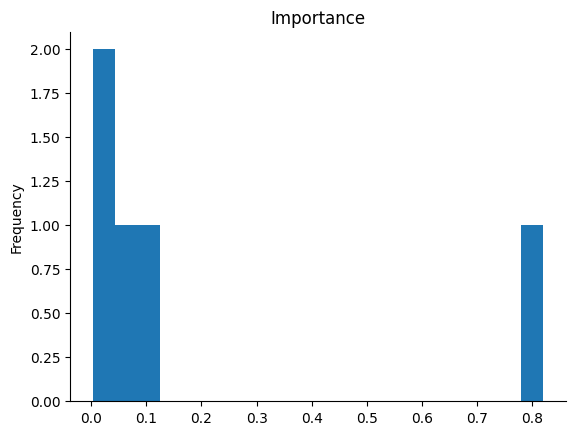

In [186]:
# @title Importance

feat_imp_df['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

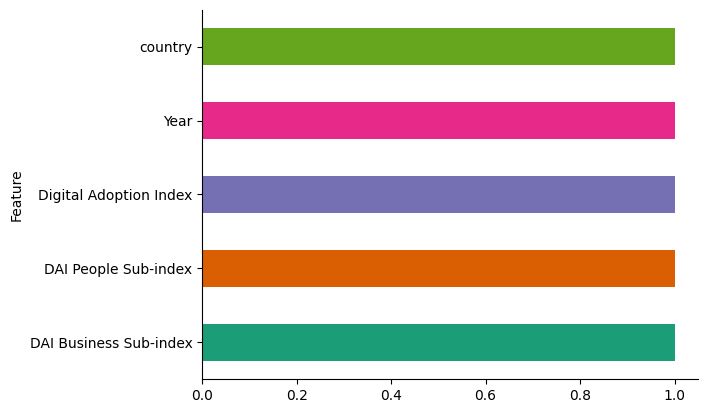

In [187]:
# @title Feature
feat_imp_df.groupby('Feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


# **Final Pipeline and Model Evaluation for DAI Data (Regression)**
This final pipeline includes preprocessing and the tuned RandomForest Regressor.

In [185]:
# %% [code]
# Final pipeline using best RandomForest Regressor for DAI Data
final_pipeline_reg_dai = grid_search_reg_dai.best_estimator_
y_final_pred_dai = final_pipeline_reg_dai.predict(X_test_reg_dai)

# Final evaluation metrics for regression on DAI Data
final_mse_dai = mean_squared_error(y_test_reg_dai, y_final_pred_dai)
final_rmse_dai = np.sqrt(final_mse_dai)
final_r2_dai = r2_score(y_test_reg_dai, y_final_pred_dai)

print("Final Model Performance (Regression) for DAI Data:")
print(f"MSE: {final_mse_dai:.2f}, RMSE: {final_rmse_dai:.2f}, R²: {final_r2_dai:.2f}")

# Saving the final pipeline for future predictions
import joblib
joblib.dump(final_pipeline_reg_dai, 'final_pipeline_reg_dai.pkl')
print("Final pipeline saved as 'final_pipeline_reg_dai.pkl'")


Final Model Performance (Regression) for DAI Data:
MSE: 1171.33, RMSE: 34.22, R²: 0.87
Final pipeline saved as 'final_pipeline_reg_dai.pkl'
